In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
train_businesses = pd.read_csv("yelp_business.csv")
train_business_attributes = pd.read_csv("yelp_business_attributes.csv")
train_business_hours = pd.read_csv("yelp_business_hours.csv")

In [4]:
train_checkins = pd.read_csv("yelp_checkin.csv")

In [104]:
train_checkins.head()

,business_id,weekday,hour,checkins
0,3Mc-LxcqeguOXOVT_2ZtCg,Tue,0:00,12
1,SVFx6_epO22bZTZnKwlX7g,Wed,0:00,4
2,vW9aLivd4-IorAfStzsHww,Tue,14:00,1
3,tEzxhauTQddACyqdJ0OPEQ,Fri,19:00,1
4,CEyZU32P-vtMhgqRCaXzMA,Tue,17:00,1


In [5]:
train_businesses.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [6]:
train_business_attributes.head()

,business_id,AcceptsInsurance,ByAppointmentOnly,BusinessAcceptsCreditCards,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,HairSpecializesIn_coloring,...,Corkage,DietaryRestrictions_dairy-free,DietaryRestrictions_gluten-free,DietaryRestrictions_vegan,DietaryRestrictions_kosher,DietaryRestrictions_halal,DietaryRestrictions_soy-free,DietaryRestrictions_vegetarian,AgesAllowed,RestaurantsCounterService
0,FYWN1wneV18bWNgQjJ2GNg,Na,Na,Na,True,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
1,He-G7vWjzVUysIKrfNbPUQ,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
2,8DShNS-LuFqpEWIp0HxijA,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
3,PfOCPjBrlQAnz__NXj9h_w,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
4,o9eMRCWt5PkpLDE0gOPtcQ,Na,Na,Na,Na,False,False,False,False,False,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na


In [102]:
print(train_business_attributes.columns)

Index(['business_id', 'AcceptsInsurance', 'ByAppointmentOnly',
       'BusinessAcceptsCreditCards', 'BusinessParking_garage',
       'BusinessParking_street', 'BusinessParking_validated',
       'BusinessParking_lot', 'BusinessParking_valet',
       'HairSpecializesIn_coloring', 'HairSpecializesIn_africanamerican',
       'HairSpecializesIn_curly', 'HairSpecializesIn_perms',
       'HairSpecializesIn_kids', 'HairSpecializesIn_extensions',
       'HairSpecializesIn_asian', 'HairSpecializesIn_straightperms',
       'RestaurantsPriceRange2', 'GoodForKids', 'WheelchairAccessible',
       'BikeParking', 'Alcohol', 'HasTV', 'NoiseLevel', 'RestaurantsAttire',
       'Music_dj', 'Music_background_music', 'Music_no_music', 'Music_karaoke',
       'Music_live', 'Music_video', 'Music_jukebox', 'Ambience_romantic',
       'Ambience_intimate', 'Ambience_classy', 'Ambience_hipster',
       'Ambience_divey', 'Ambience_touristy', 'Ambience_trendy',
       'Ambience_upscale', 'Ambience_casual', 'Restau

In [7]:
train_business_hours.head()

,business_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,FYWN1wneV18bWNgQjJ2GNg,7:30-17:0,7:30-17:0,7:30-17:0,7:30-17:0,7:30-17:0,None,None
1,He-G7vWjzVUysIKrfNbPUQ,9:0-20:0,9:0-20:0,9:0-20:0,9:0-20:0,9:0-16:0,8:0-16:0,None
2,KQPW8lFf1y5BT2MxiSZ3QA,None,None,None,None,None,None,None
3,8DShNS-LuFqpEWIp0HxijA,10:0-21:0,10:0-21:0,10:0-21:0,10:0-21:0,10:0-21:0,10:0-21:0,11:0-19:0
4,PfOCPjBrlQAnz__NXj9h_w,11:0-1:0,11:0-1:0,11:0-1:0,11:0-1:0,11:0-1:0,11:0-2:0,11:0-0:0


In [8]:
import json

In [63]:
categories = []
categories_json = json.load(open('categories.json'))

for entry in categories_json:
    if len(entry['parents']) == 1:
        parent = ",".join(entry['parents'])
        if parent not in categories:
            categories.append(parent)

In [88]:
categories = []
categories_json = json.load(open('categories.json'))

for entry in categories_json:
    if len(entry['parents']) == 0:
        categories.append(entry["title"])

In [43]:
# categories[categories.index("sportgoods")] = "sportinggoods"
# categories[categories.index("health")] = "health&medical"

In [89]:
print(categories) # businesses can belong to multiple categories

['Active Life', 'Arts & Entertainment', 'Automotive', 'Beauty & Spas', 'Bicycles', 'Education', 'Event Planning & Services', 'Financial Services', 'Food', 'Health & Medical', 'Home Services', 'Hotels & Travel', 'Local Flavor', 'Local Services', 'Mass Media', 'Nightlife', 'Pets', 'Professional Services', 'Public Services & Government', 'Religious Organizations', 'Restaurants', 'Shopping']


In [40]:
# s = "Sporting Goods;Shopping"
# temp = ''.join(c.lower() for c in s if not c.isspace())
# temp2 = temp.split(";")
# print(temp2)

['sportinggoods', 'shopping']


In [51]:
# titles = []
# for entry in train_businesses['categories']: # get titles of businesses with &
#     for c in entry.split(";"):   
#         if '&' in c and c not in titles:
#             titles.append(c)

In [52]:
# print(titles)

['Health & Medical', 'Beauty & Spas', 'Public Services & Government', 'Coffee & Tea', 'Ice Cream & Frozen Yogurt', 'Breakfast & Brunch', 'Music & Video', 'Music & DVDs', 'Fitness & Instruction', 'Arts & Entertainment', 'Pool & Hot Tub Service', 'Home & Garden', 'Event Planning & Services', 'Lighting Fixtures & Equipment', 'Guns & Ammo', 'Nurseries & Gardening', 'Hotels & Travel', 'Venues & Event Spaces', 'Flowers & Gifts', 'Auto Parts & Supplies', 'Kitchen & Bath', 'Appliances & Repair', 'Arts & Crafts', 'Counseling & Mental Health', 'Heating & Air Conditioning/HVAC', 'Eyewear & Opticians', 'Party & Event Planning', 'Chocolatiers & Shops', 'IT Services & Computer Repair', 'Cosmetics & Beauty Supply', 'Musical Instruments & Teachers', 'Sewing & Alterations', 'Photography Stores & Services', 'Juice Bars & Smoothies', 'Shades & Blinds', 'Fruits & Veggies', 'Child Care & Day Care', 'Wine & Spirits', 'Stadiums & Arenas', 'Dry Cleaning & Laundry', 'Videos & Video Game Rental', 'Hot Tub & Poo

In [61]:
# aliases = {}
# for title in titles: # create hashmap of aliases to titles
#     for entry in categories_json:
#         if title == entry['title'] and entry['alias'] not in aliases:
#             aliases[title] = entry['alias']

In [62]:
# print(aliases)

{'Health & Medical': 'health', 'Beauty & Spas': 'beautysvc', 'Public Services & Government': 'publicservicesgovt', 'Coffee & Tea': 'coffee', 'Ice Cream & Frozen Yogurt': 'icecream', 'Breakfast & Brunch': 'breakfast_brunch', 'Music & DVDs': 'musicvideo', 'Fitness & Instruction': 'fitness', 'Arts & Entertainment': 'arts', 'Pool & Hot Tub Service': 'poolservice', 'Home & Garden': 'homeandgarden', 'Event Planning & Services': 'eventservices', 'Lighting Fixtures & Equipment': 'lighting', 'Guns & Ammo': 'guns_and_ammo', 'Nurseries & Gardening': 'gardening', 'Hotels & Travel': 'hotelstravel', 'Venues & Event Spaces': 'venues', 'Flowers & Gifts': 'flowers', 'Auto Parts & Supplies': 'autopartssupplies', 'Kitchen & Bath': 'kitchenandbath', 'Appliances & Repair': 'homeappliancerepair', 'Arts & Crafts': 'artsandcrafts', 'Counseling & Mental Health': 'c_and_mh', 'Heating & Air Conditioning/HVAC': 'hvac', 'Eyewear & Opticians': 'opticians', 'Party & Event Planning': 'eventplanning', 'Chocolatiers & 

In [97]:
for entry in categories_json:
    if entry['alias'] in categories:
        categories[categories.index(entry['alias'])] = entry['title']

In [65]:
print(categories)

['Local Services', 'Italian', 'Bars', 'Food', 'Fashion', 'Professional Services', 'Beauty & Spas', 'Health & Medical', 'Doctors', 'Shopping', 'Education', 'Nightlife', 'Fitness & Instruction', 'Tours', 'Medical Spas', 'Restaurants', 'Religious Organizations', 'Hotels', 'Automotive', 'Transportation', 'Hotels & Travel', 'Airports', 'Active Life', 'Portuguese', 'French', 'Pet Services', 'Pets', 'Real Estate Agents', 'Real Estate', 'Home & Garden', 'Arabian', 'Arts & Entertainment', 'Spanish', 'Home Services', 'Museums', 'Specialty Schools', 'Arts & Crafts', 'Supernatural Readings', 'Farms', 'Party Equipment Rentals', 'Public Services & Government', 'Insurance', 'Plumbing', 'German', 'Event Planning & Services', 'Lawyers', 'Financial Services', 'Bicycles', 'Sporting Goods', 'Pet Stores', 'Japanese', 'Hair Salons', 'Books, Mags, Music & Video', 'Photographers', 'Brazilian', 'Martial Arts', 'Breweries', 'Medical Centers', 'Specialty Food', 'Cannabis Clinics', 'Chinese', 'Auto Glass Services

In [99]:
def find_category(entry):
    # temp = ''.join(c.lower() for c in entry if not c.isspace())
    for category in entry.split(";"):
        if category in categories: # use first valid category if multiple
            return category

In [100]:
train_businesses['category'] = train_businesses['categories'].apply(find_category)

In [101]:
train_businesses.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,category
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...,Health & Medical
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...,Beauty & Spas
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...,Public Services & Government
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping,Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...,Nightlife


In [286]:
train_businesses.to_csv('./train_businessess_categories.csv', index=False)

In [ ]:
# weekend = ['Saturday', 'Sunday']
# weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# for index, row in train_business_hours:
#     for day in weekend:
#         if row[day] != 'None':
#             train_business_hours = 

In [5]:
days = {'Mon': 0, 'Tue': 0, 'Wed': 0, 'Thu': 0, 
        'Fri': 0, 'Sat': 0, 'Sun': 0}

for index, row in train_checkins.iterrows(): # num rows > num businesses
    days[row['weekday']] += row['checkins']

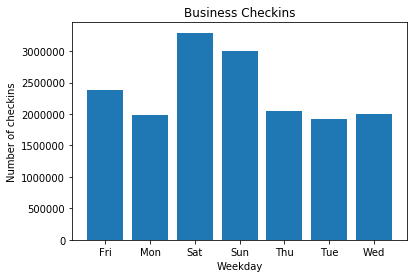

In [6]:
plt.bar(list(days.keys()), days.values())
plt.title('Business Checkins')
plt.ylabel('Number of checkins')
plt.xlabel('Weekday')
plt.show()

In [172]:
train_checkins['weekday_checkins'] = 0
train_checkins['weekend_checkins'] = 0

In [173]:
weekdays = "MonTueWedThuFri"

for index, row in train_checkins.iterrows():
    if row['weekday'] in weekdays:
        checkins = row['weekday_checkins'] + row['checkins']
        train_checkins.set_value(index,'weekday_checkins',checkins)
    else:
        checkins = row['weekend_checkins'] + row['checkins']
        train_checkins.set_value(index,'weekend_checkins',checkins)

In [174]:
train_checkins1 = train_checkins.groupby(['business_id']).sum()

In [175]:
len(train_checkins1)

146350

In [176]:
train_checkins1.head()

,checkins,weekday_checkins,weekend_checkins
business_id,,,
--6MefnULPED_I942VcFNA,139,62,77
--7zmmkVg-IMGaXbuVd0SQ,153,56,97
--8LPVSo5i0Oo61X01sV9A,1,1,0
--9QQLMTbFzLJ_oT-ON3Xw,33,17,16
--9e1ONYQuAa-CB_Rrw7Tw,2568,1297,1271


In [287]:
train_checkins1.to_csv('./train_checkins_best_days.csv', index=False)

In [190]:
import geopy.distance
import math

In [ ]:
# can use Pyhagorean distances when small difference in longitudes?
# 6371000. * Sqrt[dx^2 + dy^2]] * pi / 180 meters

# 6371000. * sqrt[0.033] * pi / 180 = 20199.5615418 meters = 12.551077 miles

# speed up calculation by only clustering businesses by city first, less comparisons

In [195]:
for index1, row1 in train_businesses[0:1].iterrows():
    coords_1 = (row1['latitude'], row1['longitude'])
    
    for index2, row2 in train_businesses.iterrows():
        coords_2 = (row2['latitude'], row2['longitude'])
        if(row1['city'] == row2['city']):  
            print(geopy.distance.vincenty(coords_1, coords_2).miles)

0.0
0.8824970209340817
1.9274367013355476
3.540145100590445
1.246953339418397
2.0302518381264356
2.137348120672766
1.0384585987854422
0.9106397232314405
1.1870915459877913
1.910791839301554
0.8824970209340817
0.9160036543769844
0.7077016379586077
1.7556282118251307


KeyboardInterrupt: 

In [228]:
distances = []
for index1, row1 in train_businesses[15:16].iterrows():
    print(row1['city'])
    for index2, row2 in train_businesses.iterrows():
        if(row1['city'] == row2['city']):  
            meters = 6371000*math.sqrt((row1['latitude']-row2['latitude'])**2 + (row1['longitude']-row2['longitude'])**2) * math.pi / 180
            distances.append(meters * 0.000621371)

Toronto


In [265]:
count = 0
for index, row in train_businesses.iterrows():
    if row['city'] == "Las Vegas":
        print(index)
        print(row['latitude'], row['longitude'])
        count += 1
        if count == 4:
            break

6
36.20743 -115.26846
7
36.1974844 -115.2496601
26
36.0850508374 -115.11942080200001
41
36.056382 -115.269332


In [261]:
coords_1 = (36.0412109, -115.13226100000001)
coords_2 = (36.068215, -115.24336129999999)
print(geopy.distance.vincenty(coords_1, coords_2).miles)

6.492782860382485


In [230]:
list_distances = list(value for value in distances if not math.isnan(value))

In [239]:
print(len(list_distances))

17205


In [242]:
print(len([x for x in distances if x < 25])) # most businesses under 25 miles

17201


In [245]:
print(len([x for x in distances if x < 4])) # most businesses under 25 miles

6213


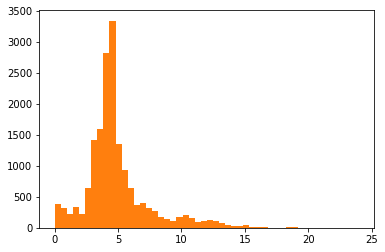

In [252]:
plt.hist(list_distances, bins=50, range=(0, 24))
plt.show()

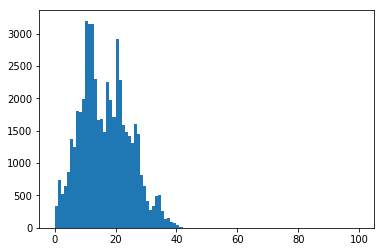

In [273]:
plt.hist(state_distances, bins=100, range=(0, 100))
plt.show()

In [269]:
# city distances too small to cluster, most under 25 miles
state_distances = []
for index1, row1 in train_businesses[0:1].iterrows():
    coords_1 = (row1['latitude'], row1['longitude'])
    
    for index2, row2 in train_businesses.iterrows():
        coords_2 = (row2['latitude'], row2['longitude'])
        if(row1['state'] == row2['state']):  
            meters = 6371000*math.sqrt((row1['latitude']-row2['latitude'])**2 + (row1['longitude']-row2['longitude'])**2) * 3.14159 / 180
            state_distances.append(meters * 0.000621)

In [274]:
train_businesses['proximity'] = 0

In [295]:
state_distances = {}

# city distances too small to cluster, most under 25 miles
for index1, row1 in train_businesses.iterrows():
    coords_1 = (row1['latitude'], row1['longitude'])
    
    in_count = 0
    total_count = 0
    for index2, row2 in train_businesses.iterrows():
        coords_2 = (row2['latitude'], row2['longitude'])
        if(row1['state'] == row2['state']):  
            meters = 6371000*math.sqrt((row1['latitude']-row2['latitude'])**2 + (row1['longitude']-row2['longitude'])**2) * 3.14159 / 180
            if meters * 0.000621 < 12.5: # if miles < 12.5
                in_count += 1
            total_count += 1
    state_distances[row1['state']] = in_count/total_count
                
    train_businesses.set_value(index1,'proximity',in_count)
    train_businesses.set_value(index1,'proximity_percent',in_count/total_count)
    print("index {}, {} / {}: {:.2f}%".format(index1, in_count, total_count, in_count/total_count * 100))

index 0, 19548 / 52214: 37.44%
index 1, 2937 / 10109: 29.05%
index 2, 20044 / 52214: 38.39%
index 3, 23527 / 52214: 45.06%
index 4, 1359 / 12609: 10.78%
index 5, 2983 / 3118: 95.67%
index 6, 23363 / 33086: 70.61%
index 7, 25037 / 33086: 75.67%
index 8, 2093 / 10109: 20.70%
index 9, 20033 / 33086: 60.55%
index 10, 508 / 10109: 5.03%
index 11, 13183 / 52214: 25.25%
index 12, 5708 / 30208: 18.90%
index 13, 6997 / 10109: 69.22%
index 14, 9024 / 12956: 69.65%
index 15, 22440 / 30208: 74.28%
index 16, 12034 / 52214: 23.05%
index 17, 2333 / 4754: 49.07%
index 18, 4709 / 52214: 9.02%
index 19, 9329 / 30208: 30.88%
index 20, 19408 / 30208: 64.25%
index 21, 18592 / 52214: 35.61%
index 22, 24628 / 52214: 47.17%
index 23, 5761 / 30208: 19.07%
index 24, 20242 / 30208: 67.01%
index 25, 19732 / 30208: 65.32%
index 26, 27685 / 33086: 83.68%
index 27, 19868 / 30208: 65.77%
index 28, 1287 / 12609: 10.21%
index 29, 656 / 679: 96.61%
index 30, 19816 / 30208: 65.60%
index 31, 24479 / 52214: 46.88%
index 32

index 258, 5138 / 12609: 40.75%
index 259, 15834 / 52214: 30.33%
index 260, 4159 / 12956: 32.10%
index 261, 19935 / 30208: 65.99%
index 262, 607 / 679: 89.40%
index 263, 17491 / 33086: 52.87%
index 264, 7046 / 10109: 69.70%
index 265, 648 / 679: 95.43%
index 266, 50 / 85: 58.82%
index 267, 30566 / 33086: 92.38%
index 268, 7531 / 10109: 74.50%
index 269, 25562 / 33086: 77.26%
index 270, 6954 / 8169: 85.13%
index 271, 21714 / 52214: 41.59%
index 272, 1035 / 52214: 1.98%
index 273, 19513 / 52214: 37.37%
index 274, 22557 / 33086: 68.18%
index 275, 6581 / 10109: 65.10%
index 276, 20272 / 30208: 67.11%
index 277, 4204 / 30208: 13.92%
index 278, 19711 / 30208: 65.25%
index 279, 14898 / 52214: 28.53%
index 280, 12705 / 52214: 24.33%
index 281, 28479 / 52214: 54.54%
index 282, 8150 / 52214: 15.61%
index 283, 3699 / 52214: 7.08%
index 284, 7618 / 52214: 14.59%
index 285, 5231 / 12609: 41.49%
index 286, 12373 / 52214: 23.70%
index 287, 26501 / 33086: 80.10%
index 288, 22028 / 52214: 42.19%
index 

index 513, 21279 / 52214: 40.75%
index 514, 5213 / 12609: 41.34%
index 515, 12670 / 52214: 24.27%
index 516, 29641 / 33086: 89.59%
index 517, 8391 / 52214: 16.07%
index 518, 27131 / 33086: 82.00%
index 519, 26469 / 52214: 50.69%
index 520, 1061 / 12956: 8.19%
index 521, 2596 / 30208: 8.59%
index 522, 6702 / 30208: 22.19%
index 523, 13242 / 52214: 25.36%
index 524, 7384 / 52214: 14.14%
index 525, 31040 / 33086: 93.82%
index 526, 1695 / 12956: 13.08%
index 527, 28458 / 52214: 54.50%
index 528, 18436 / 52214: 35.31%
index 529, 20602 / 52214: 39.46%
index 530, 5388 / 52214: 10.32%
index 531, 19324 / 30208: 63.97%
index 532, 20484 / 30208: 67.81%
index 533, 21555 / 52214: 41.28%
index 534, 10375 / 52214: 19.87%
index 535, 7167 / 8169: 87.73%
index 536, 4188 / 12956: 32.32%
index 537, 24843 / 33086: 75.09%
index 538, 23720 / 33086: 71.69%
index 539, 6071 / 30208: 20.10%
index 540, 1857 / 12956: 14.33%
index 541, 12836 / 30208: 42.49%
index 542, 791 / 12609: 6.27%
index 543, 19982 / 33086: 60

index 766, 24108 / 52214: 46.17%
index 767, 29809 / 33086: 90.10%
index 768, 1129 / 33086: 3.41%
index 769, 5566 / 12609: 44.14%
index 770, 3474 / 4754: 73.08%
index 771, 2789 / 12609: 22.12%
index 772, 30969 / 33086: 93.60%
index 773, 1605 / 12609: 12.73%
index 774, 6760 / 30208: 22.38%
index 775, 1396 / 12609: 11.07%
index 776, 7255 / 12956: 56.00%
index 777, 4692 / 12609: 37.21%
index 778, 25897 / 33086: 78.27%
index 779, 26042 / 33086: 78.71%
index 780, 23213 / 33086: 70.16%
index 781, 30513 / 33086: 92.22%
index 782, 3763 / 3795: 99.16%
index 783, 30485 / 33086: 92.14%
index 784, 9077 / 12956: 70.06%
index 785, 22067 / 30208: 73.05%
index 786, 26577 / 52214: 50.90%
index 787, 8289 / 12956: 63.98%
index 788, 24118 / 52214: 46.19%
index 789, 28111 / 33086: 84.96%
index 790, 23534 / 52214: 45.07%
index 791, 30904 / 33086: 93.41%
index 792, 21100 / 33086: 63.77%
index 793, 3856 / 4754: 81.11%
index 794, 17893 / 52214: 34.27%
index 795, 17326 / 52214: 33.18%
index 796, 6981 / 10109: 69

KeyboardInterrupt: 

In [322]:
partial_combined = pd.read_csv("partial_combined.csv")

In [297]:
partial_combined.head()

,Unnamed: 0,review_id,user_id,business_id,review_rating,city,business_rating,business_review_count,checkins,review_count,elite,average_stars,Rep,compliments,followers_count,tip_count
0,0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,119.0,6.0,None,4.67,0.0,0.0,0.0,0.0
1,1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,Montréal,4.5,50,62.0,6.0,None,4.67,0.0,0.0,0.0,0.0
2,2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,Outremont,4.0,70,72.0,6.0,None,4.67,0.0,0.0,0.0,0.0
3,3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,Montréal,3.5,61,89.0,6.0,None,4.67,0.0,0.0,0.0,0.0
4,4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,Montréal,4.5,397,755.0,6.0,None,4.67,0.0,0.0,0.0,0.0


In [309]:
train_businesses.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,category,proximity,proximity_percent
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...,Health & Medical,19548,0.374382
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...,Beauty & Spas,2937,0.290533
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...,Public Services & Government,20044,0.383882
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping,Shopping,23527,0.450588
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...,Nightlife,1359,0.107780


In [317]:
train_businesses1 = train_businesses.drop(['name', 'neighborhood', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars', 'review_count', 'is_open'], axis=1)

In [318]:
train_businesses1.head()

,business_id,categories,category,proximity,proximity_percent
0,FYWN1wneV18bWNgQjJ2GNg,Dentists;General Dentistry;Health & Medical;Or...,Health & Medical,19548,0.374382
1,He-G7vWjzVUysIKrfNbPUQ,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...,Beauty & Spas,2937,0.290533
2,KQPW8lFf1y5BT2MxiSZ3QA,Departments of Motor Vehicles;Public Services ...,Public Services & Government,20044,0.383882
3,8DShNS-LuFqpEWIp0HxijA,Sporting Goods;Shopping,Shopping,23527,0.450588
4,PfOCPjBrlQAnz__NXj9h_w,American (New);Nightlife;Bars;Sandwiches;Ameri...,Nightlife,1359,0.107780


In [330]:
type(partial_combined1.ix[0]['category'])

float

In [331]:
type(train_businesses1.ix[0]['category'])

str

In [334]:
partial_combined1 = partial_combined.join(train_businesses1.set_index('business_id'), lsuffix='_business_id')

In [10]:
partial_combined1 = pd.read_csv("./train_temp2.csv", encoding="ISO-8859-1")

In [11]:
train_checkins1 = pd.read_csv("./train_temp1.csv", encoding="ISO-8859-1")

In [16]:
partial_combined1 = partial_combined1.drop([''])

,Unnamed: 0,review_id,user_id,business_id,review_rating,city,business_rating,business_review_count,checkins,review_count,elite,average_stars,Rep,compliments,followers_count,tip_count,category
0,0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,119.0,6.0,None,4.67,0.0,0.0,0.0,0.0,Food
1,6221,vm1b1keOzwHjtGZEPPuYXA,xYciRtVZ1PW4IxSX4oJ1aw,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,119.0,177.0,"2015, 2017, 2016",3.41,53.0,69.0,234.0,1.0,Food
2,315305,SXwA9KZ-Nc_hMARk_3cJ7g,5Ymfsf9fAYz-Ds_p0xawVQ,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,119.0,79.0,"2013, 2014",4.52,1.0,156.0,84.0,0.0,Food
3,358422,jUzausdZ_ujqe_n8BlBj-g,DVOOF0Z627DyrZ4XKQbTgA,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,119.0,40.0,None,3.98,1.0,8.0,92.0,0.0,Food
4,365332,oCRDwF3tszAkeszSfxwthg,5JoKz3mU42Cp906KRXDwJw,AEx2SYEUJmTxVVB18LlCwA,4,Montréal,4.0,84,119.0,3.0,None,4.00,0.0,0.0,0.0,0.0,Food


In [15]:
partial_combined = partial_combined1.merge(train_checkins1, left_on='business_id', right_on='business_id')

MemoryError: 

In [13]:
partial_combined.head()

,Unnamed: 0,review_id,user_id,business_id,review_rating,city,business_rating,business_review_count,checkins,review_count,elite,average_stars,Rep,compliments,followers_count,tip_count,category,weekday_checkins,weekend_checkins
0,0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,119.0,6.0,None,4.67,0.0,0.0,0.0,0.0,Food,NaN,NaN
1,6221,vm1b1keOzwHjtGZEPPuYXA,xYciRtVZ1PW4IxSX4oJ1aw,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,119.0,177.0,"2015, 2017, 2016",3.41,53.0,69.0,234.0,1.0,Food,NaN,NaN
2,315305,SXwA9KZ-Nc_hMARk_3cJ7g,5Ymfsf9fAYz-Ds_p0xawVQ,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,119.0,79.0,"2013, 2014",4.52,1.0,156.0,84.0,0.0,Food,NaN,NaN
3,358422,jUzausdZ_ujqe_n8BlBj-g,DVOOF0Z627DyrZ4XKQbTgA,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,119.0,40.0,None,3.98,1.0,8.0,92.0,0.0,Food,NaN,NaN
4,365332,oCRDwF3tszAkeszSfxwthg,5JoKz3mU42Cp906KRXDwJw,AEx2SYEUJmTxVVB18LlCwA,4,Montréal,4.0,84,119.0,3.0,None,4.00,0.0,0.0,0.0,0.0,Food,NaN,NaN


In [336]:
partial_combined1 = partial_combined.merge(train_businesses1, left_on='business_id', right_on='business_id')

In [337]:
partial_combined1.head()

,Unnamed: 0,review_id,user_id,business_id,review_rating,city,business_rating,business_review_count,checkins,review_count,elite,average_stars,Rep,compliments,followers_count,tip_count,categories,category,proximity,proximity_percent
0,0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,119.0,6.0,None,4.67,0.0,0.0,0.0,0.0,Diners;Food;Restaurants;Delis,Food,0,NaN
1,6221,vm1b1keOzwHjtGZEPPuYXA,xYciRtVZ1PW4IxSX4oJ1aw,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,119.0,177.0,"2015, 2017, 2016",3.41,53.0,69.0,234.0,1.0,Diners;Food;Restaurants;Delis,Food,0,NaN
2,315305,SXwA9KZ-Nc_hMARk_3cJ7g,5Ymfsf9fAYz-Ds_p0xawVQ,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,119.0,79.0,"2013, 2014",4.52,1.0,156.0,84.0,0.0,Diners;Food;Restaurants;Delis,Food,0,NaN
3,358422,jUzausdZ_ujqe_n8BlBj-g,DVOOF0Z627DyrZ4XKQbTgA,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,119.0,40.0,None,3.98,1.0,8.0,92.0,0.0,Diners;Food;Restaurants;Delis,Food,0,NaN
4,365332,oCRDwF3tszAkeszSfxwthg,5JoKz3mU42Cp906KRXDwJw,AEx2SYEUJmTxVVB18LlCwA,4,Montréal,4.0,84,119.0,3.0,None,4.00,0.0,0.0,0.0,0.0,Diners;Food;Restaurants;Delis,Food,0,NaN


In [338]:
partial_combined1 = partial_combined1.drop(['categories'], axis=1)

In [355]:
partial_combined1 = partial_combined1.drop(['proximity', 'proximity_percent'], axis=1)

In [357]:
partial_combined1.head()

,Unnamed: 0,review_id,user_id,business_id,review_rating,city,business_rating,business_review_count,checkins,review_count,elite,average_stars,Rep,compliments,followers_count,tip_count,category
0,0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,119.0,6.0,None,4.67,0.0,0.0,0.0,0.0,Food
1,6221,vm1b1keOzwHjtGZEPPuYXA,xYciRtVZ1PW4IxSX4oJ1aw,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,119.0,177.0,"2015, 2017, 2016",3.41,53.0,69.0,234.0,1.0,Food
2,315305,SXwA9KZ-Nc_hMARk_3cJ7g,5Ymfsf9fAYz-Ds_p0xawVQ,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,119.0,79.0,"2013, 2014",4.52,1.0,156.0,84.0,0.0,Food
3,358422,jUzausdZ_ujqe_n8BlBj-g,DVOOF0Z627DyrZ4XKQbTgA,AEx2SYEUJmTxVVB18LlCwA,5,Montréal,4.0,84,119.0,40.0,None,3.98,1.0,8.0,92.0,0.0,Food
4,365332,oCRDwF3tszAkeszSfxwthg,5JoKz3mU42Cp906KRXDwJw,AEx2SYEUJmTxVVB18LlCwA,4,Montréal,4.0,84,119.0,3.0,None,4.00,0.0,0.0,0.0,0.0,Food


In [4]:
import unicodecsv as csv

In [5]:
train_checkins1.to_csv('./train_temp1.csv', index=False)

NameError: name 'train_checkins1' is not defined

In [6]:
partial_combined1.to_csv('./train_temp2.csv', index=False)

NameError: name 'partial_combined1' is not defined

In [332]:
partial_combined1[['category']] = partial_combined1[['category']].astype('str')

In [312]:
count = 0
for index, row in train_businesses.iterrows():
    if row['business_id'] == "AEx2SYEUJmTxVVB18LlCwA":
        print(index)
        print(row['latitude'], row['longitude'])
        count += 1
        if count == 4:
            break

141797
45.5233326 -73.5948595
